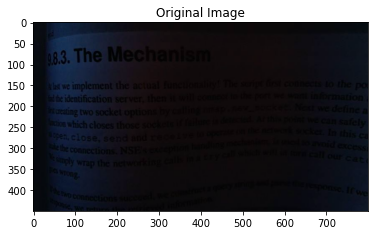

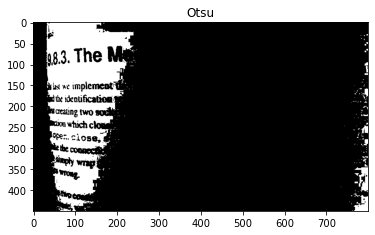

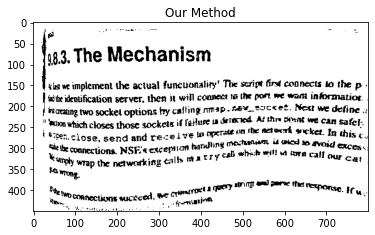

In [2]:
#libraries
import numpy as np
from numpy import linalg
import cv2
from math import sqrt
from math import atan
from math import pow
import matplotlib.pyplot as plt
import glob
from PIL import Image

#reading the image
a = cv2.imread("Original/06.jpg")

#showing the original image
plt.title("Original Image")
plt.imshow(a)
plt.show()

#making 3 grayscale images 
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
c = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
d = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

#k-value range [0.1-0.5] can be changed depending on image
k=0.2

#r-value can be changed depending on image
r=128

#neighbouring window size can be changed depending on image
window=35

#otsu thresholding
ret2,th= cv2.threshold(b,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#showing otsu result
plt.title("Otsu")
plt.imshow(th,cmap='gray')
plt.show()


h,w=b.shape

th=0
value=[]
threshold=[]
m=0
var=0
std=0
b,c=cv2.integral2(b)

h,w=c.shape

#Sauvola Method using integrl images
for i in range(1, w , 1):
    for j in range(1, h , 1):
        if(j>(h-int(window/2)) and i>(w-int(window/2))):
            m = (b[j, i] + b[j - int(window/2), i - int(window/2)] - b[
                j , i - int(window/2)] - b[j - int(window/2), i]) / (window * window)
            s = (c[j, i] + c[j - int(window/2), i - int(window/2)] - c[
                j, i - int(window/2)] - c[j - int(window/2), i]) / (window * window)
        elif (i > (w - int(window/2)) and j < (h - int(window/2))):
            m = (b[j + int(window/2), i] + b[j - int(window/2), i - int(window/2)] - b[
                j + int(window/2), i - int(window/2)] - b[j - int(window/2), i]) / (window * window)
            s = (c[j + int(window/2), i] + c[j - int(window/2), i - int(window/2)] - c[
                j + int(window/2), i - int(window/2)] - c[j - int(window/2), i]) / (window * window)
        elif(j>(h-int(window/2)) and i<(w-int(window/2))):
            m = ( b[j,i+int(window/2)]+b[j-int(window/2),i-int(window/2)]-b[j,i-int(window/2)]-b[j-int(window/2),i+int(window/2)])/(window*window)
            s = (  c[j,i+int(window/2)]+c[j-int(window/2),i-int(window/2)]-c[j,i-int(window/2)]-c[j-int(window/2),i+int(window/2)])/(window*window)
        elif(j<(h-int(window/2) ) and i<(w-int(window/2))):
            m=(b[j+int(window/2),i+int(window/2)]+b[j-int(window/2),i-int(window/2)]-b[j+int(window/2),i-int(window/2)]-b[j-int(window/2),i+int(window/2)])/(window*window)
            s=(c[j+int(window/2),i+int(window/2)]+c[j-int(window/2),i-int(window/2)]-c[j+int(window/2),i-int(window/2)]-c[j-int(window/2),i+int(window/2)])/(window*window)
        var = ((s)- (pow((m), 2)))/(window*window)
        std = sqrt(abs(var))
        T = m * (1 + (k * ((std / r) - 1)))
        threshold.append(T)




h1,w1=d.shape

#setting pixel values based on computed threshold
for i in range(0, w1, 1):
     for j in range(0, h1, 1):

        if (d[j, i] <= threshold[th]):
             d[j, i] = 0
        else:
             d[j, i] = 255
        th=th+1
        
for i in range(0, int(window/2), 1):
    for j in range(0, h1, 1):
        d[j,i]=255
for i in range(0, w1, 1):
    for j in range(0, int(window/2), 1):
        d[j,i]=255
        
plt.title("Our Method")
plt.imshow(d,cmap='gray')
plt.show()